Ejercicios Axiomas de probabilidad

In [3]:
# Importar la biblioteca math
import math

# Punto 1: Verificar si P = a1*P1 + a2*P2 es una medida de probabilidad

# Definimos dos medidas de probabilidad arbitrarias
def P1(A):
    if A == frozenset():  # Evento vacío
        return 0
    elif A == frozenset({1}):  # {1}
        return 0.4
    elif A == frozenset({2}):  # {2}
        return 0.6
    elif A == frozenset({1, 2}):  # {1, 2}
        return 1
    else:
        return None

def P2(A):
    if A == frozenset():  # Evento vacío
        return 0
    elif A == frozenset({1}):  # {1}
        return 0.7
    elif A == frozenset({2}):  # {2}
        return 0.3
    elif A == frozenset({1, 2}):  # {1, 2}
        return 1
    else:
        return None

# Definimos la medida combinada P = a1*P1 + a2*P2 con a1 + a2 = 1
a1, a2 = 0.5, 0.5  # Coeficientes
def P_combined(A):
    return a1 * P1(A) + a2 * P2(A)

# Verificar los axiomas de Kolmogorov
Omega = frozenset({1, 2})  # Espacio muestral
axioms = {
    "Axioma 1: P(A) ≥ 0": all(P_combined(A) >= 0 for A in [frozenset(), frozenset({1}), frozenset({2}), frozenset({1, 2})]),
    "Axioma 2: P(Ω) = 1": P_combined(Omega) == 1,
    "Axioma 3: Aditividad finita": P_combined(frozenset({1})) + P_combined(frozenset({2})) == P_combined(Omega),
}
axioms

# Punto 2: Verificar si la función P dada es una medida de probabilidad

# Definición de la medida P
def P(A):
    if A == frozenset():  # A = vacío
        return 0
    elif A == frozenset({1}):  # A = {1}
        return 1 / 3
    elif A == frozenset({2}):  # A = {2}
        return 2 / 3
    elif A == frozenset({1, 2}):  # A = {1, 2}
        return 1
    else:
        return None  # No definido para otros conjuntos

# Verificar los axiomas de Kolmogorov
axioms_P = {
    "Axioma 1: P(A) ≥ 0": all(P(A) >= 0 for A in [frozenset(), frozenset({1}), frozenset({2}), frozenset({1, 2})]),
    "Axioma 2: P(Ω) = 1": P(Omega) == 1,
    "Axioma 3: Aditividad finita": P(frozenset({1})) + P(frozenset({2})) == P(Omega),
}
axioms_P

# Punto 3: Demostrar propiedades básicas

# Espacio muestral y eventos
A = frozenset({1})
B = frozenset({1, 2})

# Propiedades a verificar
properties = {}

# 1. P(A^c) = 1 - P(A)
Ac = Omega - A
properties['P(A^c) = 1 - P(A)'] = math.isclose(P(Ac), 1 - P(A), abs_tol=1e-9)

# 2. P(∅) = 0
properties['P(∅) = 0'] = P(frozenset()) == 0

# 3. P(B) = P(A) + P(B \ A) si A ⊆ B
B_minus_A = B - A
properties['P(B) = P(A) + P(B \\ A)'] = P(B) == P(A) + P(B_minus_A)

# 4. P(A) ≤ 1, ∀A ⊆ Ω
properties['P(A) ≤ 1, ∀A ⊆ Ω'] = all(P(event) <= 1 for event in [frozenset(), frozenset({1}), frozenset({2}), frozenset({1, 2})])

# Resultados de las propiedades
properties


{'P(A^c) = 1 - P(A)': True,
 'P(∅) = 0': True,
 'P(B) = P(A) + P(B \\ A)': True,
 'P(A) ≤ 1, ∀A ⊆ Ω': True}

Ejercicios Probabilidad condicional y total

In [8]:
# Definición de los datos
total_participantes = 1000

# Hombres y mujeres que usan o no gafas
hombres_gafas = 185
hombres_no_gafas = 415
mujeres_gafas = 115
mujeres_no_gafas = 285

# Totales
hombres_total = hombres_gafas + hombres_no_gafas  # 600
mujeres_total = mujeres_gafas + mujeres_no_gafas  # 400
usa_gafas_total = hombres_gafas + mujeres_gafas  # 300
no_gafas_total = hombres_no_gafas + mujeres_no_gafas  # 700

# a) Probabilidad de ser hombre P(H)
P_H = hombres_total / total_participantes

# b) Probabilidad de ser mujer P(M)
P_M = mujeres_total / total_participantes

# c) Probabilidad de usar gafas P(G)
P_G = usa_gafas_total / total_participantes

# d) Probabilidad de que alguien lleve gafas dado que es mujer P(G | M)
# P(G | M) = P(G ∩ M) / P(M)
P_G_given_M = mujeres_gafas / mujeres_total

# Resultados
resultados = {
    "P(H)": P_H,
    "P(M)": P_M,
    "P(G)": P_G,
    "P(G | M)": P_G_given_M
}
resultados


{'P(H)': 0.6, 'P(M)': 0.4, 'P(G)': 0.3, 'P(G | M)': 0.2875}

In [10]:
# Ejercicio 2: Dados y urnas

# Configuración de las urnas
urna_1 = {"roja": 3, "negra": 1, "verde": 6}  # Total: 10 bolas
urna_2 = {"roja": 6, "negra": 2, "verde": 2}  # Total: 10 bolas

# Probabilidad de elegir cada urna según el lanzamiento del dado
P_urna_1 = 2 / 6  # Si el dado muestra 1 o 2
P_urna_2 = 4 / 6  # Si el dado muestra 3, 4, 5, o 6

# Total de bolas en cada urna
total_urna_1 = sum(urna_1.values())  # 10
total_urna_2 = sum(urna_2.values())  # 10

# a) Probabilidad de que la bola obtenida sea roja, P(R)
P_R_given_urna_1 = urna_1["roja"] / total_urna_1
P_R_given_urna_2 = urna_2["roja"] / total_urna_2
P_R = P_urna_1 * P_R_given_urna_1 + P_urna_2 * P_R_given_urna_2

# b) Probabilidad de que la bola obtenida sea negra, P(N)
P_N_given_urna_1 = urna_1["negra"] / total_urna_1
P_N_given_urna_2 = urna_2["negra"] / total_urna_2
P_N = P_urna_1 * P_N_given_urna_1 + P_urna_2 * P_N_given_urna_2

# c) Probabilidad de que sea de la urna 1 si se ha obtenido una bola negra, P(1 | N)
# Usamos Bayes: P(1 | N) = P(N | 1) * P(1) / P(N)
P_1_given_N = (P_N_given_urna_1 * P_urna_1) / P_N

# d) Probabilidad de que sea de la urna 2 si se ha obtenido una bola negra, P(2 | N)
# Usamos Bayes: P(2 | N) = P(N | 2) * P(2) / P(N)
P_2_given_N = (P_N_given_urna_2 * P_urna_2) / P_N

# Resultados del Ejercicio 2
resultados_ejercicio_2 = {
    "P(R)": P_R,
    "P(N)": P_N,
    "P(1 | N)": P_1_given_N,
    "P(2 | N)": P_2_given_N
}

resultados_ejercicio_2



{'P(R)': 0.49999999999999994,
 'P(N)': 0.16666666666666666,
 'P(1 | N)': 0.2,
 'P(2 | N)': 0.8}

In [11]:
# Ejercicio 3: Bolsa con dulces

# Configuración de la bolsa
dulces = {"limón": 2, "fresa": 3}  # Total: 5 dulces

# Total de dulces
total_dulces = sum(dulces.values())

# Probabilidad de obtener un dulce de fresa en el primer intento, P(F1)
P_F1 = dulces["fresa"] / total_dulces

# Probabilidad de obtener un dulce de fresa en el segundo intento, P(F2 | F1)
# Si ya sacamos un dulce de fresa, quedan 2 dulces de fresa y el total disminuye en 1
P_F2_given_F1 = (dulces["fresa"] - 1) / (total_dulces - 1)

# Probabilidad conjunta de obtener dos dulces de fresa, P(F ∩ F)
P_F_and_F = P_F1 * P_F2_given_F1

# Resultado del Ejercicio 3
resultado_ejercicio_3 = {"P(F ∩ F)": P_F_and_F}

resultado_ejercicio_3

{'P(F ∩ F)': 0.3}

Teorema de Bayes

In [12]:
# Ejercicio 1: Probabilidad y Teorema de Bayes

# Datos iniciales
P_fuma = 0.4  # Probabilidad de que un paciente fume
P_no_fuma = 1 - P_fuma  # Probabilidad de que no fume

P_hombre_given_fuma = 0.75  # Probabilidad de que sea hombre dado que fuma
P_mujer_given_no_fuma = 0.6  # Probabilidad de que sea mujer dado que no fuma

# a) Probabilidad de que sea mujer, P(M)
# P(M) = P(Fuma ∩ Mujer) + P(No fuma ∩ Mujer)
P_mujer_given_fuma = 1 - P_hombre_given_fuma  # Complemento
P_mujer = P_fuma * P_mujer_given_fuma + P_no_fuma * P_mujer_given_no_fuma

# b) Probabilidad de que sea hombre y fume, P(F ∩ H)
P_hombre_and_fuma = P_fuma * P_hombre_given_fuma

# c) Probabilidad de que fume dado que es mujer, P(F | M)
# P(F | M) = P(F ∩ M) / P(M)
P_fuma_and_mujer = P_fuma * P_mujer_given_fuma
P_fuma_given_mujer = P_fuma_and_mujer / P_mujer

# Resultados del Ejercicio 1
resultados_ejercicio_1 = {
    "P(M)": P_mujer,
    "P(F ∩ H)": P_hombre_and_fuma,
    "P(F | M)": P_fuma_given_mujer
}

resultados_ejercicio_1


{'P(M)': 0.45999999999999996,
 'P(F ∩ H)': 0.30000000000000004,
 'P(F | M)': 0.2173913043478261}

In [13]:
import math
import numpy as np

# Ejercicio 2: Distribución de Poisson y Bayes

# Datos iniciales
lambdas = np.array([1, 2, 3, 4])  # Posibles valores de λ
prior = np.array([0.4, 0.3, 0.2, 0.1])  # Probabilidades a priori Π(λ)
x_observado = 4  # Número de estudiantes observados

# a) Estimación inicial del parámetro λ
lambda_estimada_inicial = np.sum(lambdas * prior)

# b) Función de verosimilitud para cada modelo
# L(x | λ) = (λ^x * e^(-λ)) / x!
likelihood = (lambdas**x_observado * np.exp(-lambdas)) / math.factorial(x_observado)

# c) Distribución posterior usando el Teorema de Bayes
# P(λ | x) = L(x | λ) * Π(λ) / Σ[L(x | λ) * Π(λ)]
posterior = likelihood * prior
posterior /= posterior.sum()  # Normalizar

# d) Verificar normalización (la suma debe ser 1)
normalizacion = posterior.sum()

# e) Modelo más probable
modelo_mas_probable = lambdas[np.argmax(posterior)]

# f) Mejor parámetro λ
lambda_mejor = np.sum(lambdas * posterior)

# Resultados del Ejercicio 2
resultados_ejercicio_2 = {
    "Estimación inicial de λ": lambda_estimada_inicial,
    "Likelihood": likelihood,
    "Posterior": posterior,
    "Suma posterior (normalización)": normalizacion,
    "Modelo más probable": modelo_mas_probable,
    "Mejor parámetro λ": lambda_mejor
}

resultados_ejercicio_2


{'Estimación inicial de λ': np.float64(2.0),
 'Likelihood': array([0.01532831, 0.09022352, 0.16803136, 0.19536681]),
 'Posterior': array([0.07101262, 0.31348898, 0.38922576, 0.22627264]),
 'Suma posterior (normalización)': np.float64(1.0),
 'Modelo más probable': np.int64(3),
 'Mejor parámetro λ': np.float64(2.7707584253176796)}

In [14]:
# Ejercicio 3: Likelihood conjunto

# Nuevos datos de observación
x1, x2 = 4, 5  # Número de estudiantes observados en dos intervalos

# Likelihood conjunta: L(x1, x2 | λ) = L(x1 | λ) * L(x2 | λ)
likelihood_conjunta = (lambdas**x1 * np.exp(-lambdas) / math.factorial(x1)) * \
                      (lambdas**x2 * np.exp(-lambdas) / math.factorial(x2))

# Distribución posterior con el likelihood conjunto
posterior_conjunta = likelihood_conjunta * prior
posterior_conjunta /= posterior_conjunta.sum()  # Normalizar

# Mejor parámetro λ con el likelihood conjunto
lambda_mejor_conjunta = np.sum(lambdas * posterior_conjunta)

# Resultados del Ejercicio 3
resultados_ejercicio_3 = {
    "Likelihood conjunta": likelihood_conjunta,
    "Posterior conjunta": posterior_conjunta,
    "Mejor parámetro λ (conjunto)": lambda_mejor_conjunta
}

resultados_ejercicio_3


{'Likelihood conjunta': array([4.69914178e-05, 3.25611358e-03, 1.69407219e-02, 3.05345539e-02]),
 'Posterior conjunta': array([0.00252736, 0.1313438 , 0.45556534, 0.41056351]),
 'Mejor parámetro λ (conjunto)': np.float64(3.274164986959538)}

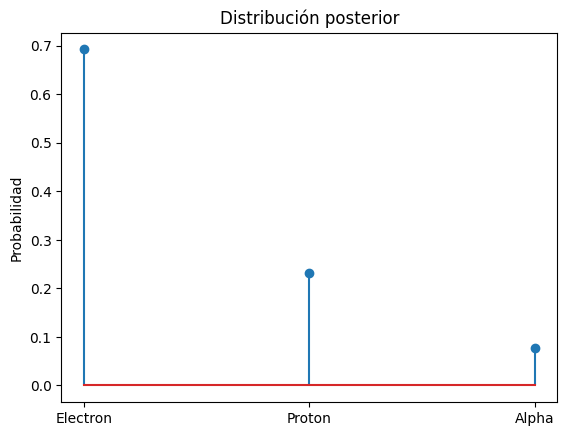

{'P(e | D)': 0.6923076923076923,
 'P(p | D)': 0.23076923076923075,
 'P(α | D)': 0.07692307692307693}

In [15]:
import matplotlib.pyplot as plt

# Ejercicio 4: Haz de partículas

# a) Densidad de probabilidad a priori
# Flujo de electrones = 2 * flujo de protones = 2 * flujo de partículas α
P_electron = 2 / (2 + 1 + 1)
P_proton = 1 / (2 + 1 + 1)
P_alpha = 1 / (2 + 1 + 1)

# b) Probabilidad de detección P(D)
efficiencies = {"electron": 0.9, "proton": 0.6, "alpha": 0.2}
P_D = (P_electron * efficiencies["electron"] +
       P_proton * efficiencies["proton"] +
       P_alpha * efficiencies["alpha"])

# c) Distribución posterior
posterior_electron = (efficiencies["electron"] * P_electron) / P_D
posterior_proton = (efficiencies["proton"] * P_proton) / P_D
posterior_alpha = (efficiencies["alpha"] * P_alpha) / P_D

posterior = [posterior_electron, posterior_proton, posterior_alpha]

# Visualización de la distribución posterior
plt.stem(["Electron", "Proton", "Alpha"], posterior)
plt.title("Distribución posterior")
plt.ylabel("Probabilidad")
plt.show()

# d) Probabilidades dadas detección
resultados_ejercicio_4 = {
    "P(e | D)": posterior_electron,
    "P(p | D)": posterior_proton,
    "P(α | D)": posterior_alpha
}

resultados_ejercicio_4


Técnicas de conteo

In [16]:
from math import factorial
from itertools import permutations, combinations

# Funciones auxiliares
def permutaciones(n, r):
    """Calcula las permutaciones: P(n, r) = n! / (n - r)!"""
    return factorial(n) // factorial(n - r)

def combinaciones(n, r):
    """Calcula las combinaciones: C(n, r) = n! / (r! * (n - r)!)"""
    return factorial(n) // (factorial(r) * factorial(n - r))

def combinaciones_repeticion(n, r):
    """Calcula combinaciones con repetición: C(n + r - 1, r)"""
    return factorial(n + r - 1) // (factorial(r) * factorial(n - 1))


# Solución para cada ejercicio

# 1) Podio (primer y segundo lugar con 3 participantes)
ejercicio_1 = permutaciones(3, 2)

# 2) Ensalada con 2 ingredientes entre plátano, manzana y uva
ejercicio_2 = combinaciones(3, 2)

# 3) Cola de 5 amigos
ejercicio_3 = permutaciones(5, 5)  # También es factorial(5)

# 4) Premios para 8 participantes (primer, segundo y tercer lugar)
ejercicio_4 = permutaciones(8, 3)

# 5) Seleccionar 2 marineros entre 10
ejercicio_5 = combinaciones(10, 2)

# 6) Acomodar 5 libros de 7 disponibles
ejercicio_6 = permutaciones(7, 5)

# 7) Formar un comité de 2 alumnos entre 10
ejercicio_7 = combinaciones(10, 2)

# 8) Palabras diferentes con las letras de "REMEMBER"
# Fórmula: n! / (n1! * n2! * ... nk!)
letras = {'R': 2, 'E': 3, 'M': 2, 'B': 1}
total_letras = sum(letras.values())
ejercicio_8 = factorial(total_letras) // (
    factorial(letras['R']) * factorial(letras['E']) * factorial(letras['M']) * factorial(letras['B'])
)

# 9) Equipos con 6 jugadoras donde siempre está María
# Elegir 5 jugadoras más de las restantes 11
ejercicio_9 = combinaciones(11, 5)

# 10) Jugos surtidos con al menos 2 frutas entre 4
jugos_2_frutas = combinaciones(4, 2)
jugos_3_frutas = combinaciones(4, 3)
ejercicio_10 = jugos_2_frutas + jugos_3_frutas

# 11) Elegir presidente, vicepresidente y secretario entre 10
ejercicio_11 = permutaciones(10, 3)

# 12) Campeón y subcampeón entre 8 equipos
ejercicio_12 = permutaciones(8, 2)

# 13) Números de 3 cifras distintas con dígitos del 1 al 7
ejercicio_13 = permutaciones(7, 3)

# 14) Números de 3 cifras (repetición permitida) con dígitos del 1 al 7
ejercicio_14 = 7**3

# 15) Seleccionar un comité de 3 estudiantes entre 10
ejercicio_15 = combinaciones(10, 3)

# 16) Placas con 3 letras (26 posibilidades) y 3 dígitos (10 posibilidades)
ejercicio_16 = (26**3) * (10**3)

# 17) Sentar n personas alrededor de una mesa
n = 5  # Número de personas
ejercicio_17 = factorial(n - 1)

# 18) Helados de 3 sabores entre 7 disponibles
ejercicio_18 = combinaciones(7, 3)

# 19) Selección de 3 gaseosas entre 6 sabores
# Sin repetición
sin_repeticion = combinaciones(6, 3)
# Con repetición
con_repeticion = combinaciones_repeticion(6, 3)
ejercicio_19 = (sin_repeticion, con_repeticion)

# 20) Fórmula de combinaciones con repetición
# Comprobamos con un ejemplo n=6, r=3
n, r = 6, 3
formula_comprobada = combinaciones_repeticion(n, r)

# Resultados finales
resultados = {
    "1": ejercicio_1,
    "2": ejercicio_2,
    "3": ejercicio_3,
    "4": ejercicio_4,
    "5": ejercicio_5,
    "6": ejercicio_6,
    "7": ejercicio_7,
    "8": ejercicio_8,
    "9": ejercicio_9,
    "10": ejercicio_10,
    "11": ejercicio_11,
    "12": ejercicio_12,
    "13": ejercicio_13,
    "14": ejercicio_14,
    "15": ejercicio_15,
    "16": ejercicio_16,
    "17": ejercicio_17,
    "18": ejercicio_18,
    "19": ejercicio_19,
    "20": formula_comprobada,
}

resultados


{'1': 6,
 '2': 3,
 '3': 120,
 '4': 336,
 '5': 45,
 '6': 2520,
 '7': 45,
 '8': 1680,
 '9': 462,
 '10': 10,
 '11': 720,
 '12': 56,
 '13': 210,
 '14': 343,
 '15': 120,
 '16': 17576000,
 '17': 24,
 '18': 35,
 '19': (20, 56),
 '20': 56}

Generales de Probabilidad

In [17]:
from itertools import product

# Espacio muestral
dado = [1, 2, 3, 4, 5, 6]
espacio_muestral = list(product(dado, dado))
total_casos = len(espacio_muestral)

# Evento A: La suma es menor o igual a 3
evento_A = [(x, y) for x, y in espacio_muestral if x + y <= 3]
P_A = len(evento_A) / total_casos

# Evento B: El primer lanzamiento es impar
evento_B = [(x, y) for x, y in espacio_muestral if x % 2 != 0]
P_B = len(evento_B) / total_casos

# Evento A ∪ B: Unión de A y B
evento_A_union_B = list(set(evento_A + evento_B))
P_A_union_B = len(evento_A_union_B) / total_casos

# Complemento de A: A^c
evento_Ac = [(x, y) for x, y in espacio_muestral if x + y > 3]
P_Ac = len(evento_Ac) / total_casos

# Resultados
print("P(A):", P_A)
print("P(B):", P_B)
print("P(A ∪ B):", P_A_union_B)
print("P(A^c):", P_Ac)


P(A): 0.08333333333333333
P(B): 0.5
P(A ∪ B): 0.5277777777777778
P(A^c): 0.9166666666666666


In [18]:
from math import comb

# Número total de celulares y defectuosos
total_celulares = 50
defectuosos = 2
funcionales = total_celulares - defectuosos
seleccionados = 5

# Probabilidad de ningún celular defectuoso (complemento)
P_Ac = comb(funcionales, seleccionados) / comb(total_celulares, seleccionados)

# Probabilidad de al menos un celular defectuoso
P_A = 1 - P_Ac

# Resultados
print("P(Ac) (ningún defectuoso):", P_Ac)
print("P(A) (al menos un defectuoso):", P_A)


P(Ac) (ningún defectuoso): 0.8081632653061225
P(A) (al menos un defectuoso): 0.19183673469387752


In [19]:
# Probabilidades dadas
P_A = 0.6  # Probabilidad de estar suscrito al diario
P_B = 0.8  # Probabilidad de estar suscrito al cable
P_A_intersection_B = 0.5  # Probabilidad de estar suscrito a ambos

# Parte (a): Probabilidad de estar suscrito a uno de los dos servicios
# Fórmula: P(A ∪ B) = P(A) + P(B) - P(A ∩ B)
P_A_union_B = P_A + P_B - P_A_intersection_B
print(f"(a) La probabilidad de estar suscrito a uno de los dos servicios (P(A ∪ B)) es: {P_A_union_B}")

# Parte (b): Probabilidad de estar suscrito al diario o al cable, pero no a ambos
# Fórmula: P((A ∩ B^c) ∪ (B ∩ A^c)) = P(A) + P(B) - 2 * P(A ∩ B)
P_only_one = P_A + P_B - 2 * P_A_intersection_B
print(f"(b) La probabilidad de estar suscrito solo al diario o solo al cable es: {P_only_one}")


(a) La probabilidad de estar suscrito a uno de los dos servicios (P(A ∪ B)) es: 0.8999999999999999
(b) La probabilidad de estar suscrito solo al diario o solo al cable es: 0.3999999999999999


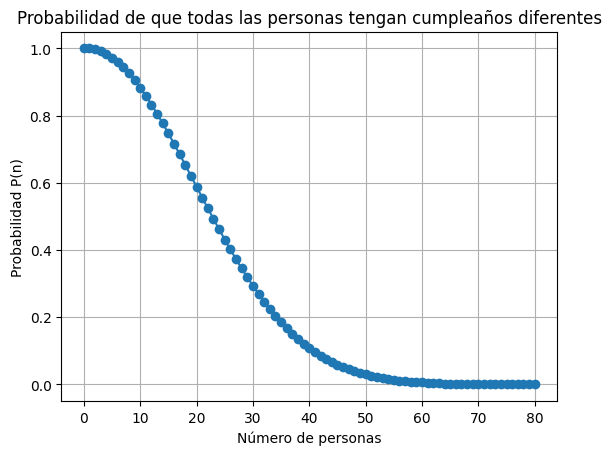

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Número máximo de personas a considerar
max_personas = 80

# Calcular P(n) como producto acumulado
probabilidades = []
P_n = 1  # Inicializamos con probabilidad de 1 para n = 0
for n in range(max_personas + 1):
    if n > 0:
        P_n *= (365 - (n - 1)) / 365  # Actualizamos el producto acumulado
    probabilidades.append(P_n)

# Graficar los resultados
personas = np.arange(max_personas + 1)
plt.plot(personas, probabilidades, 'o-')
plt.title("Probabilidad de que todas las personas tengan cumpleaños diferentes")
plt.xlabel("Número de personas")
plt.ylabel("Probabilidad P(n)")
plt.grid()
plt.show()


In [21]:
# Probabilidades individuales
P_A = 5 / 36  # Probabilidad de que la suma de los dos dados sea 8
P_B = 1 / 2   # Probabilidad de que el segundo dado muestre un número impar

# Parte 1: Cálculo de P(A ∩ B)
# Combinaciones favorables a A ∩ B (suma de 8 y segundo dado impar): (3, 5), (5, 3)
num_favorable_A_intersection_B = 2  # Casos favorables
total_combinations = 36             # Total de combinaciones posibles con dos dados
P_A_intersection_B = num_favorable_A_intersection_B / total_combinations
print(f"P(A ∩ B) = {P_A_intersection_B:.5f}")

# Parte 2: Cálculo de P(A) * P(B)
P_A_times_P_B = P_A * P_B
print(f"P(A) * P(B) = {P_A_times_P_B:.5f}")

# Comparación de P(A ∩ B) con P(A) * P(B)
if P_A_intersection_B == P_A_times_P_B:
    print("Los eventos A y B son independientes.")
else:
    print("Los eventos A y B no son independientes.")


P(A ∩ B) = 0.05556
P(A) * P(B) = 0.06944
Los eventos A y B no son independientes.


In [27]:
import random

# Función para simular el lanzamiento de 3 dados y verificar si hay exactamente 1 par
def lanzar_tres_dados():
    dados = [random.randint(1, 6) for _ in range(3)]
    dados.sort()  # Ordenamos los dados para facilitar la verificación del par
    # Verificamos si hay exactamente un par (dos iguales y uno distinto)
    return len(set(dados)) == 2 and dados.count(dados[0]) == 2

# Parámetros de la simulación
N = 10**5  # Número de experimentos

# Simulación: Contamos cuántas veces obtenemos exactamente 1 par
contar_pares = sum(lanzar_tres_dados() for _ in range(N))

# Probabilidad experimental
probabilidad_experimental = contar_pares / N
print(f"Probabilidad experimental de obtener exactamente 1 par: {probabilidad_experimental:.5f}")

# Cálculo teórico
probabilidad_teorica = 90 / 216  # Casos favorables / Total combinaciones
print(f"Probabilidad teórica de obtener exactamente 1 par: {probabilidad_teorica:.5f}")



import math

# Función para calcular la probabilidad de obtener exactamente dos pares distintos
def probabilidad_dos_pares_distintos():
    # Número total de resultados posibles al lanzar 5 dados
    total_resultados = 6**5

    # Número de formas para obtener dos pares distintos
    # Seleccionar 2 números distintos (6 opciones)
    formas_seleccion_pares = math.comb(6, 2)
    
    # Elegir 2 dados para el primer par (5 dados disponibles)
    formas_primer_par = math.comb(5, 2)
    
    # Elegir 2 dados para el segundo par (3 dados restantes)
    formas_segundo_par = math.comb(3, 2)
    
    # El dado restante puede tomar uno de los 4 valores restantes
    opciones_restante = 4
    
    # Número de resultados favorables
    num_favorables = formas_seleccion_pares * formas_primer_par * formas_segundo_par * opciones_restante
    
    # Probabilidad de obtener exactamente dos pares distintos
    probabilidad = num_favorables / total_resultados
    return probabilidad

# Calcular la probabilidad
probabilidad = probabilidad_dos_pares_distintos()
print(f"La probabilidad de obtener exactamente dos pares distintos al lanzar 5 dados es: {probabilidad:.5f}")
# Número total de formas de obtener 4 de la misma cara
favorable_c = 6 * comb(5, 4) * 5



Probabilidad experimental de obtener exactamente 1 par: 0.20894
Probabilidad teórica de obtener exactamente 1 par: 0.41667
La probabilidad de obtener exactamente dos pares distintos al lanzar 5 dados es: 0.23148


In [28]:
import math

# Función para calcular la probabilidad de obtener exactamente dos pares distintos
def probabilidad_dos_pares_distintos():
    total_resultados = 6**5
    formas_seleccion_pares = math.comb(6, 2)
    formas_primer_par = math.comb(5, 2)
    formas_segundo_par = math.comb(3, 2)
    opciones_restante = 4
    num_favorables = formas_seleccion_pares * formas_primer_par * formas_segundo_par * opciones_restante
    probabilidad = num_favorables / total_resultados
    return probabilidad

# Función para calcular la probabilidad de obtener exactamente 4 dados iguales
def probabilidad_cuatro_dados_iguales():
    total_resultados = 6**5
    formas_numero_igual = 6  # 6 opciones para el número que aparece 4 veces
    formas_dado_diferente = math.comb(5, 1)  # Elegir 1 dado diferente (de 5 dados)
    opciones_dado_diferente = 5  # El dado diferente puede tomar 5 valores distintos
    num_favorables = formas_numero_igual * formas_dado_diferente * opciones_dado_diferente
    probabilidad = num_favorables / total_resultados
    return probabilidad

# Calcular ambas probabilidades
probabilidad_dos_pares = probabilidad_dos_pares_distintos()
probabilidad_cuatro_dados = probabilidad_cuatro_dados_iguales()

# Mostrar los resultados
print(f"Probabilidad de obtener dos pares distintos: {probabilidad_dos_pares:.4f}")
print(f"Probabilidad de obtener 4 dados con la misma cara: {probabilidad_cuatro_dados:.4f}")


Probabilidad de obtener dos pares distintos: 0.2315
Probabilidad de obtener 4 dados con la misma cara: 0.0193


C:\Users\dnico\AppData\Local\Temp\ipykernel_8284\4113614918.py:14: RuntimeWarning: invalid value encountered in scalar divide
  return factorial(N) / (factorial(n0) * factorial(n1))


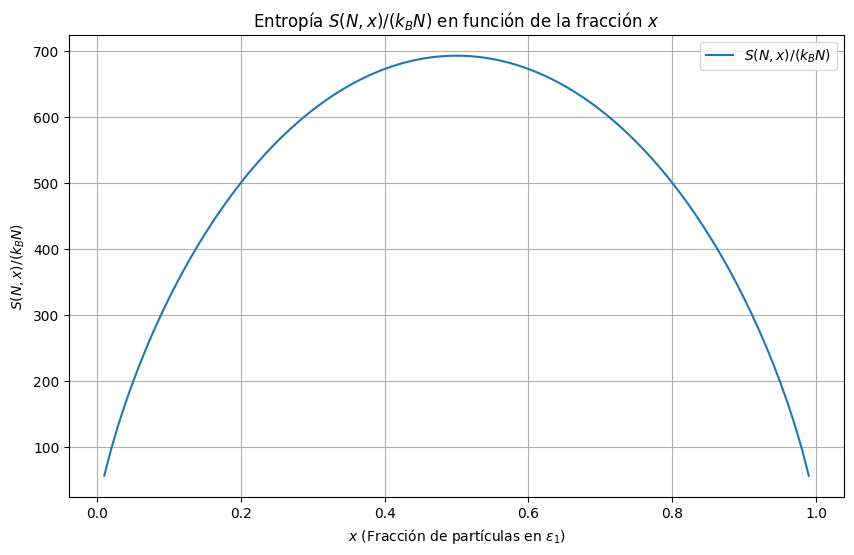

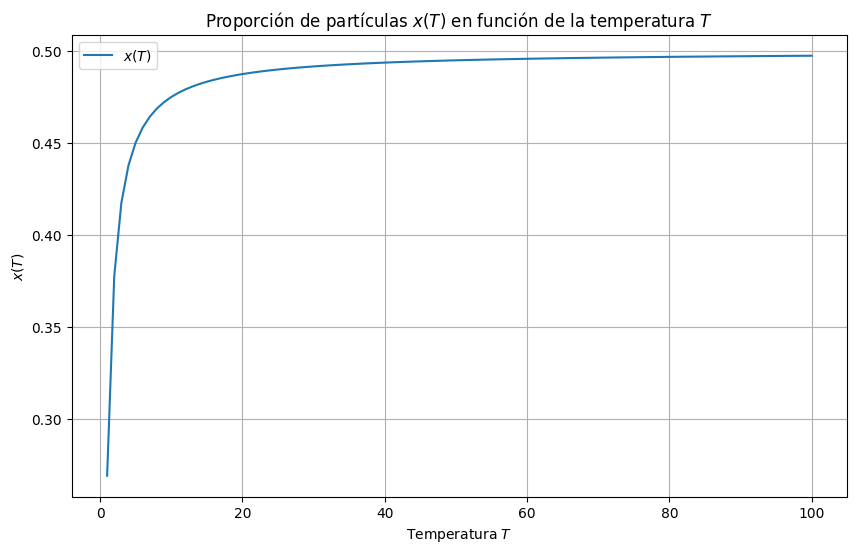

Número de configuraciones para algunos n0:
n0 = 0: Ω(N, n0) = nan
n0 = 1: Ω(N, n0) = nan
n0 = 10: Ω(N, n0) = nan
n0 = 100: Ω(N, n0) = nan
n0 = 500: Ω(N, n0) = nan

Entropía para algunos n0:
n0 = 0: S(N, n0) = nan J/K
n0 = 1: S(N, n0) = nan J/K
n0 = 10: S(N, n0) = nan J/K
n0 = 100: S(N, n0) = nan J/K
n0 = 500: S(N, n0) = nan J/K

Entropía a altas temperaturas: 693.1471805599452
Cambio de entropía en una expansión isotérmica: 693.1471805599452


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial

# Parámetros
N = 1000  # Número total de partículas
epsilon_0 = 1  # Energía del estado 0
epsilon_1 = 2  # Energía del estado 1
k_B = 1  # Constante de Boltzmann

# (a) Número de configuraciones posibles (micro-estados) 
def microstates(N, n0):
    n1 = N - n0
    return factorial(N) / (factorial(n0) * factorial(n1))

# (b) Entropía
def entropy(N, n0):
    n1 = N - n0
    omega = microstates(N, n0)
    return k_B * np.log(omega)

# (c) Entropía en función de la fracción x
def entropy_fraction(N, x):
    return -k_B * N * (x * np.log(x) + (1 - x) * np.log(1 - x))

# (d) Gráfica de la entropía
x_values = np.linspace(0.01, 0.99, 100)  # Valores de x entre 0 y 1
entropy_values = entropy_fraction(N, x_values)

# (e) Proporción de partículas en función de la temperatura
def x_temperature(T, epsilon_0, epsilon_1):
    delta_e = epsilon_1 - epsilon_0
    return 1 / (1 + np.exp(delta_e / (k_B * T)))

# (f) Entropía a altas temperaturas
def high_temperature_entropy():
    return k_B * N * np.log(2)

# (g) Expansión isotérmica de un gas ideal
def entropy_change_isothermal(V1, V2, N):
    return N * k_B * np.log(V2 / V1)

# Resultados de los cálculos

# (a) Número de configuraciones para algunos valores de n0
n0_values = np.array([0, 1, 10, 100, 500])
microstates_values = [microstates(N, n0) for n0 in n0_values]

# (b) Entropía para algunos valores de n0
entropy_values_n0 = [entropy(N, n0) for n0 in n0_values]

# (d) Gráfica de la entropía como función de la fracción x
plt.figure(figsize=(10, 6))
plt.plot(x_values, entropy_values, label=r'$S(N,x)/(k_B N)$')
plt.title(r'Entropía $S(N,x)/(k_B N)$ en función de la fracción $x$')
plt.xlabel(r'$x$ (Fracción de partículas en $\varepsilon_1$)')
plt.ylabel(r'$S(N,x)/(k_B N)$')
plt.grid(True)
plt.legend()
plt.show()

# (e) Proporción de partículas en función de la temperatura (para T entre 1 y 100)
T_values = np.linspace(1, 100, 100)
x_values_T = x_temperature(T_values, epsilon_0, epsilon_1)

plt.figure(figsize=(10, 6))
plt.plot(T_values, x_values_T, label=r'$x(T)$')
plt.title(r'Proporción de partículas $x(T)$ en función de la temperatura $T$')
plt.xlabel(r'Temperatura $T$')
plt.ylabel(r'$x(T)$')
plt.grid(True)
plt.legend()
plt.show()

# (f) Entropía a altas temperaturas
S_high_T = high_temperature_entropy()

# (g) Cambio de entropía en una expansión isotérmica
V1 = 1  # Volumen inicial
V2 = 2  # Volumen final
entropy_change = entropy_change_isothermal(V1, V2, N)

# Resultados numéricos
print("Número de configuraciones para algunos n0:")
for n0, omega in zip(n0_values, microstates_values):
    print(f"n0 = {n0}: Ω(N, n0) = {omega:.2e}")

print("\nEntropía para algunos n0:")
for n0, ent in zip(n0_values, entropy_values_n0):
    print(f"n0 = {n0}: S(N, n0) = {ent:.2f} J/K")

print("\nEntropía a altas temperaturas:", S_high_T)
print("Cambio de entropía en una expansión isotérmica:", entropy_change)


Problemas Hidden Markov Models

In [29]:
import numpy as np

# Definir la matriz de transición T
T = np.array([[0.8, 0.2],  # Desde J
              [0.2, 0.8]]) # Desde B

# Definir la matriz de emisión E
E = np.array([[0.5, 0.9],  # Cara para J y B
              [0.5, 0.1]]) # Sello para J y B

# Distribución inicial a-priori
pi = np.array([0.2, 0.8])  # Probabilidad inicial de J y B

# Secuencia observada (S = sello, C = cara)
observaciones = ['S', 'C', 'C', 'C', 'S', 'C', 'S', 'C']

# Convertir las observaciones a índices (0 para cara, 1 para sello)
obs_map = {'C': 0, 'S': 1}
O = np.array([obs_map[obs] for obs in observaciones])

# --- Algoritmo de Viterbi para encontrar la secuencia más probable ---
n_obs = len(O)
n_states = T.shape[0]

# Inicializar las matrices de probabilidad y seguimiento
delta = np.zeros((n_obs, n_states))  # Probabilidad máxima hasta el tiempo t
psi = np.zeros((n_obs, n_states), dtype=int)  # Índice del estado previo

# Inicialización en t=0
delta[0, :] = pi * E[:, O[0]]

# Iteración para t = 1, ..., n_obs-1
for t in range(1, n_obs):
    for j in range(n_states):
        prob = delta[t-1, :] * T[:, j]
        psi[t, j] = np.argmax(prob)
        delta[t, j] = prob[psi[t, j]] * E[j, O[t]]

# Retropropagación para obtener la secuencia más probable
states = np.zeros(n_obs, dtype=int)
states[-1] = np.argmax(delta[-1, :])  # Último estado más probable
for t in range(n_obs-2, -1, -1):
    states[t] = psi[t+1, states[t+1]]

# Convertir los estados a etiquetas ('J' y 'B')
state_map = {0: 'J', 1: 'B'}
most_probable_sequence = [state_map[state] for state in states]

# Calcular la probabilidad de la secuencia más probable
P_sequence = delta[-1, states[-1]]

print("Secuencia más probable de monedas:", most_probable_sequence)
print("Probabilidad de la secuencia:", P_sequence)

# --- Probabilidades marginales para cada observación ---
P_o = np.sum(delta, axis=1)
print("Probabilidades marginales para cada observación:", P_o)

# Verificar que la suma de las probabilidades es 1
print("Suma de probabilidades marginales:", np.sum(P_o))

# --- ¿Depende del a-priori? ---
print("Distribución inicial afecta al resultado:", "Sí" if not np.isclose(P_o[0], 1) else "No")


Secuencia más probable de monedas: ['J', 'J', 'J', 'J', 'J', 'J', 'J', 'J']
Probabilidad de la secuencia: 0.0009555148800000006
Probabilidades marginales para cada observación: [0.26       0.104      0.0416     0.01664    0.008704   0.0041472
 0.00245514 0.00119439]
Suma de probabilidades marginales: 0.438740736
Distribución inicial afecta al resultado: Sí


Ejercicios Muestreo

Media: 74.48076741302954
Mediana: 74.36521854110143


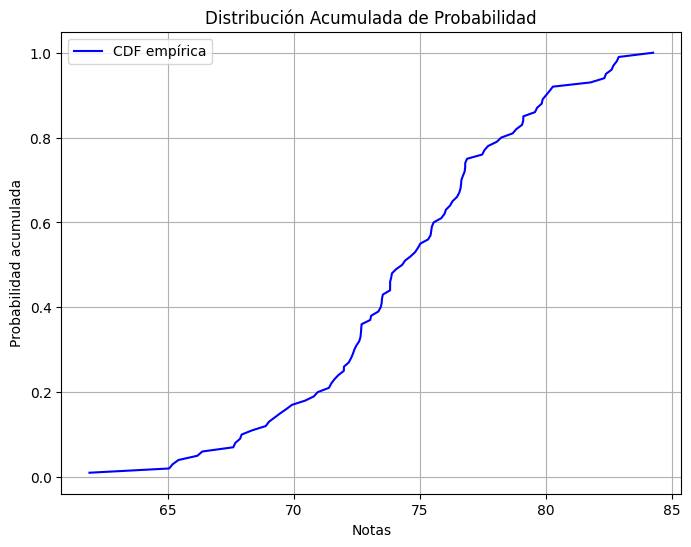

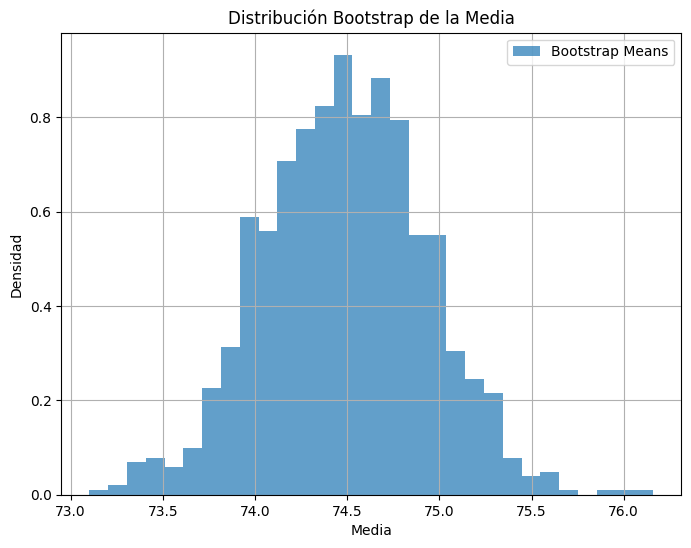

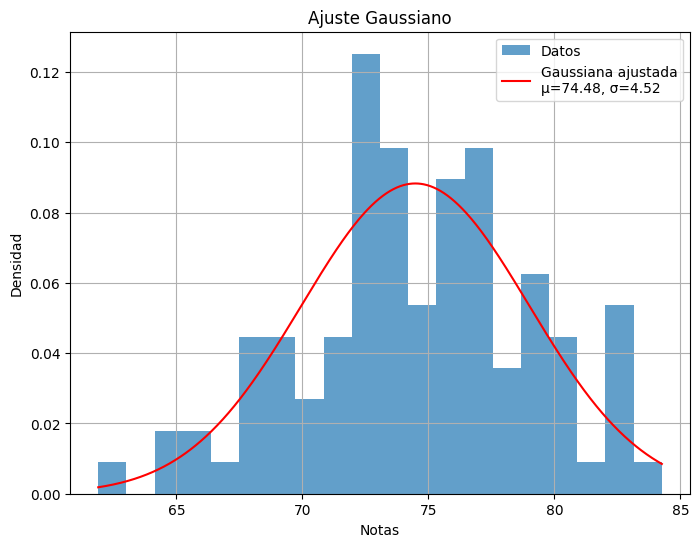

Mediana Bootstrap: 74.49422483578175


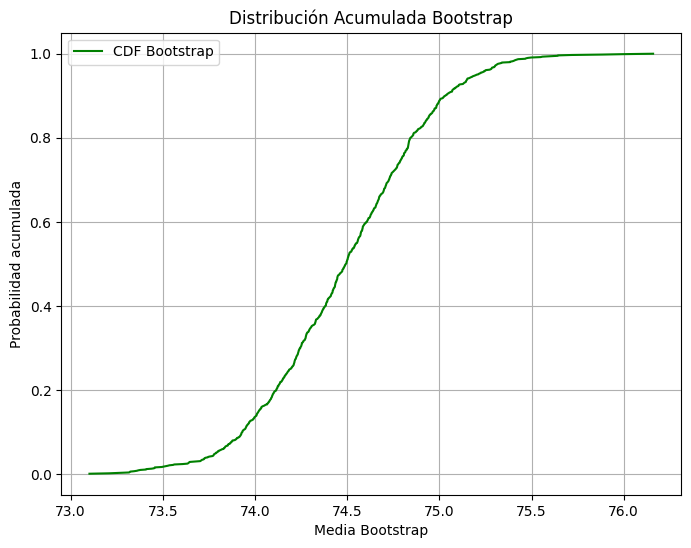

Comparación de estimaciones:
- Media: 74.48
- Mediana: 74.37
- Media Bootstrap: 74.49
- Mediana Bootstrap: 74.49
- Ajuste Gaussiano (Media): 74.48
- Ajuste Gaussiano (Desv. Estándar): 4.52


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Datos simulados (reemplazar con los datos reales si están disponibles)
np.random.seed(42)  # Para reproducibilidad
data = np.random.normal(75, 5, 100)  # Supongamos datos simulados con media 75 y sigma 5

# a) Calcular la media
mean_data = np.mean(data)
print("Media:", mean_data)

# b) Calcular la mediana
median_data = np.percentile(data, 50)
print("Mediana:", median_data)

# c) Distribución acumulada de frecuencia y probabilidad
data_sorted = np.sort(data)
cdf = np.arange(1, len(data) + 1) / len(data)  # Distribución acumulada de probabilidad

plt.figure(figsize=(8, 6))
plt.plot(data_sorted, cdf, label="CDF empírica", color="blue")
plt.title("Distribución Acumulada de Probabilidad")
plt.xlabel("Notas")
plt.ylabel("Probabilidad acumulada")
plt.legend()
plt.grid()
plt.show()

# d) Bootstrapping para la distribución de la media
bootstrap_samples = 1000  # Número de muestras de bootstrapping
bootstrap_means = [
    np.mean(np.random.choice(data, size=len(data), replace=True))
    for _ in range(bootstrap_samples)
]

# Mostrar histograma del bootstrap
plt.figure(figsize=(8, 6))
plt.hist(bootstrap_means, bins=30, density=True, alpha=0.7, label="Bootstrap Means")
plt.title("Distribución Bootstrap de la Media")
plt.xlabel("Media")
plt.ylabel("Densidad")
plt.legend()
plt.grid()
plt.show()

# e) Ajuste Gaussiano
mu, sigma = norm.fit(data)  # Media y desviación estándar estimadas
x = np.linspace(min(data), max(data), 1000)
gaussian_fit = norm.pdf(x, mu, sigma)

# Visualizar ajuste gaussiano
plt.figure(figsize=(8, 6))
plt.hist(data, bins=20, density=True, alpha=0.7, label="Datos")
plt.plot(x, gaussian_fit, label=f"Gaussiana ajustada\nµ={mu:.2f}, σ={sigma:.2f}", color="red")
plt.title("Ajuste Gaussiano")
plt.xlabel("Notas")
plt.ylabel("Densidad")
plt.legend()
plt.grid()
plt.show()

# f) Mediana del bootstrapping y función acumulada
bootstrap_median = np.percentile(bootstrap_means, 50)
print("Mediana Bootstrap:", bootstrap_median)

# Distribución acumulada bootstrap
bootstrap_means_sorted = np.sort(bootstrap_means)
bootstrap_cdf = np.arange(1, len(bootstrap_means_sorted) + 1) / len(bootstrap_means_sorted)

plt.figure(figsize=(8, 6))
plt.plot(bootstrap_means_sorted, bootstrap_cdf, label="CDF Bootstrap", color="green")
plt.title("Distribución Acumulada Bootstrap")
plt.xlabel("Media Bootstrap")
plt.ylabel("Probabilidad acumulada")
plt.legend()
plt.grid()
plt.show()

# g) Comparar estimaciones
print("Comparación de estimaciones:")
print(f"- Media: {mean_data:.2f}")
print(f"- Mediana: {median_data:.2f}")
print(f"- Media Bootstrap: {np.mean(bootstrap_means):.2f}")
print(f"- Mediana Bootstrap: {bootstrap_median:.2f}")
print(f"- Ajuste Gaussiano (Media): {mu:.2f}")
print(f"- Ajuste Gaussiano (Desv. Estándar): {sigma:.2f}")


In [31]:
# Velocidades dadas
v1 = 30  # mi/h de A a B
v2 = 60  # mi/h de B a A

# Cálculo de la velocidad media
d = 1  # Suponemos una distancia de 1 milla (el resultado no depende de d)
t1 = d / v1
t2 = d / v2
v_media = 2 * d / (t1 + t2)

print(f"La velocidad media es: {v_media:.2f} mi/h")


La velocidad media es: 40.00 mi/h


In [32]:
# Distancias y velocidades
d1, d2, d3 = 100, 200, 300  # millas
v1, v2, v3 = 400, 500, 600  # mi/h

# Velocidad media
numerador = d1 + d2 + d3
denominador = d1/v1 + d2/v2 + d3/v3
V = numerador / denominador

print(f"Velocidad media V: {V:.2f} mi/h")


Velocidad media V: 521.74 mi/h


In [33]:
import numpy as np

# Número de muestras
N = 10**4

# (1) Generar muestras
X1 = np.random.gamma(shape=2, scale=3, size=N)  # Gamma(2, 3)
X2 = np.random.normal(loc=5, scale=2, size=N)   # Normal(5, 2)
X3 = np.random.uniform(low=0, high=10, size=N)  # Uniform(0, 10)

# Combinación lineal: X = X1 + 2*X2 - X3
a = np.array([1, 2, -1])  # Coeficientes de la combinación lineal
X = X1 + 2*X2 - X3

# ---- (a) Media y varianza directamente ----
mean_X_direct = np.mean(X)  # Media
var_X_direct = np.var(X)    # Varianza

# ---- (b) Usando las definiciones generales de los momentos ----
# Media de X usando E(X) = a^T E(Xi)
mean_X1, mean_X2, mean_X3 = np.mean(X1), np.mean(X2), np.mean(X3)
E_X = np.array([mean_X1, mean_X2, mean_X3])  # Vector de medias
mean_X_general = np.dot(a, E_X)

# Varianza de X usando Var(X) = a^T Cov(Xi) a
var_X1, var_X2, var_X3 = np.var(X1), np.var(X2), np.var(X3)  # Varianzas individuales
cov_X = np.cov([X1, X2, X3], bias=True)  # Matriz de covarianza
var_X_general = np.dot(a, np.dot(cov_X, a))

# ---- (c) Coeficiente de correlación de Pearson ----
corr_matrix = np.corrcoef([X1, X2, X3])  # Matriz de correlación de Pearson

# ---- (d) Demostración de la fórmula de la varianza de la media ----
# Varianza de la media muestral:
# Var(1/N sum Xi) = (1/N^2) [ sum Var(Xi) + 2 sum Cov(Xi, Xj) ]

# Parte 1: Suma de varianzas individuales
sum_var = np.sum(np.var([X1, X2, X3], axis=1, ddof=0))

# Parte 2: Suma de covarianzas (doble suma)
sum_cov = 0
for i in range(3):
    for j in range(i + 1, 3):
        sum_cov += np.cov([X1, X2, X3], bias=True)[i, j]

# Varianza de la media
var_mean = (1 / N**2) * (sum_var + 2 * sum_cov)

# ---- Resultados ----
print("==== Resultados ====")
print(f"(a) Media (directa): {mean_X_direct:.4f}")
print(f"(a) Varianza (directa): {var_X_direct:.4f}")
print(f"(b) Media (general): {mean_X_general:.4f}")
print(f"(b) Varianza (general): {var_X_general:.4f}")
print("(c) Matriz de correlación de Pearson:")
print(corr_matrix)
print(f"(d) Varianza de la media muestral: {var_mean:.4e}")


==== Resultados ====
(a) Media (directa): 11.0091
(a) Varianza (directa): 42.5173
(b) Media (general): 11.0091
(b) Varianza (general): 42.5173
(c) Matriz de correlación de Pearson:
[[ 1.00000000e+00  2.18188455e-03  1.23851588e-02]
 [ 2.18188455e-03  1.00000000e+00 -2.39185615e-04]
 [ 1.23851588e-02 -2.39185615e-04  1.00000000e+00]]
(d) Varianza de la media muestral: 3.1042e-07


Ejercicios Método de MonteCarlo

In [34]:
import numpy as np

# Generar puntos aleatorios dentro de una esfera unitaria usando coordenadas cartesianas
def generar_puntos_en_esfera(N):
    puntos = []
    while len(puntos) < N:
        x, y, z = np.random.uniform(-1, 1, 3)
        if x**2 + y**2 + z**2 <= 1:  # Verificar que el punto está dentro de la esfera
            puntos.append((x, y, z))
    return np.array(puntos)

# Número de puntos de Monte Carlo
N = 100000

# Generar puntos dentro de la esfera
puntos = generar_puntos_en_esfera(N)

# Coordenadas x, y, z
x = puntos[:, 0]
y = puntos[:, 1]
z = puntos[:, 2]

# Calcular los momentos de inercia usando el método de Monte Carlo
Ixx = (1 / N) * np.sum(y**2 + z**2)
Iyy = (1 / N) * np.sum(x**2 + z**2)
Izz = (1 / N) * np.sum(x**2 + y**2)

# Calcular el producto de inercia Ixy
Ixy = -(1 / N) * np.sum(x * y)

# Resultados exactos para comparación
I_exacto = 2 / 5  # Valor teórico para Ixx, Iyy, Izz

# Imprimir resultados
print(f"Resultado aproximado por Monte Carlo:")
print(f"Ixx ≈ {Ixx}")
print(f"Iyy ≈ {Iyy}")
print(f"Izz ≈ {Izz}")
print(f"Ixy ≈ {Ixy}")

print("\nResultados teóricos:")
print(f"Ixx = Iyy = Izz = {I_exacto}")
print("Ixy = 0 (por simetría de rotación de la esfera)")


Resultado aproximado por Monte Carlo:
Ixx ≈ 0.4012037886847943
Iyy ≈ 0.4001286612818529
Izz ≈ 0.40194876374655997
Ixy ≈ -0.00022629749223204192

Resultados teóricos:
Ixx = Iyy = Izz = 0.4
Ixy = 0 (por simetría de rotación de la esfera)


In [36]:
import numpy as np

# Parámetros de la distribución Beta
alpha = 2
beta = 4

# Definir la función Beta f(x; alpha, beta)
def beta_distribution(x, alpha, beta):
    return 30 * x * (1 - x)**3  # La constante 30 = Gamma(6) / (Gamma(2) * Gamma(4))

# Método de aceptación y rechazo para calcular el área bajo la curva
def monte_carlo_accept_reject(alpha, beta, uncertainty=0.01):
    # Determinar la altura máxima aproximada de f(x) en [0, 1] (máximo teórico para Beta(2, 4) está en x=1/5)
    x_values = np.linspace(0, 1, 1000)
    f_max = max(beta_distribution(x_values, alpha, beta))
    
    # Variables para conteo
    N_accept = 0  # Número de puntos aceptados
    N_total = 0   # Total de puntos generados
    
    # Criterio de convergencia basado en incertidumbre relativa (1%)
    while True:
        # Generar un punto aleatorio en [0, 1] para x y [0, f_max] para y
        x = np.random.uniform(0, 1)
        y = np.random.uniform(0, f_max)
        
        # Evaluar f(x) y decidir si se acepta o rechaza
        if y <= beta_distribution(x, alpha, beta):
            N_accept += 1
        
        N_total += 1
        
        # Calcular el área estimada y su incertidumbre
        area_estimada = N_accept / N_total * f_max
        incertidumbre = f_max / np.sqrt(N_total)
        
        # Verificar si la incertidumbre cumple el criterio del 1%
        if incertidumbre / area_estimada <= uncertainty:
            break
    
    return area_estimada, incertidumbre, N_total

# Calcular el área bajo la curva con una incertidumbre del 1%
area, error, puntos_totales = monte_carlo_accept_reject(alpha, beta, uncertainty=0.01)

# Imprimir resultados
print(f"Área estimada bajo la curva: {area:.6f}")
print(f"Error estimado: ±{error:.6f}")
print(f"Puntos totales generados: {puntos_totales}")


C:\Users\dnico\AppData\Local\Temp\ipykernel_8284\1604065197.py:38: RuntimeWarning: divide by zero encountered in scalar divide
  if incertidumbre / area_estimada <= uncertainty:


Área estimada bajo la curva: 1.494404
Error estimado: ±0.014944
Puntos totales generados: 44829
